In [2]:
from ba_utils.metrics import fid, ice
from ba_utils.plot import plot_ice_batch, plot_fid_batch

import os
import joblib
import numpy as np 

data_dir = 'data/dump/results/'
out = 'plt_out/results/plots/'
extension = '.pdf'

In [3]:
# load the generated images
files = [f for f in os.listdir(data_dir) if f[:3] == 'out' and f[5:] == '.pkl']
images = [[joblib.load(data_dir+f'out{batch+1}{method+1}.pkl') for method in range(2)] for batch in range(int(len(files)/2))]
np.array(images).shape

(5, 2, 4, 50, 512, 512, 3)

In [4]:
# calculated the ICE and FID scores for the images
for experiment_n, experiment in enumerate(images):
    break
    # takes some time to compute so saved results are loaded in next cell
    for method_n, method in enumerate(experiment):
        ices = [ice(seed) for seed in method]
        fids = [fid(seed) for seed in method]
        joblib.dump(ices, data_dir+f'ice{experiment_n+1}{method_n+1}.pkl')
        joblib.dump(fids, data_dir+f'fid{experiment_n+1}{method_n+1}.pkl')

In [5]:
# load the precomputed ICE and FID scores
ice_values = [[joblib.load(data_dir+f'ice{experiment + 1}{method+1}.pkl') for method in range(2)] for experiment in range(int(len(files)/2))]
fid_values = [[joblib.load(data_dir+f'fid{experiment + 1}{method+1}.pkl') for method in range(2)] for experiment in range(int(len(files)/2))]

Evaluation for experiment 1


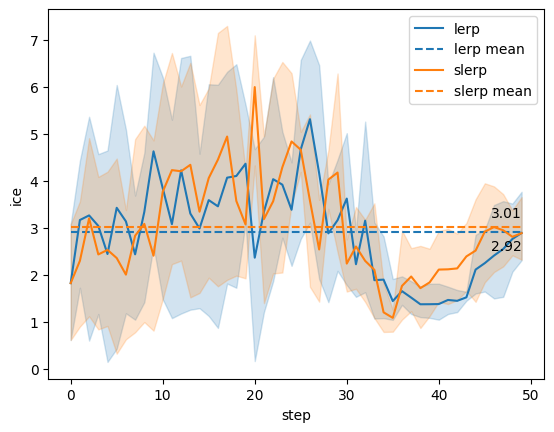

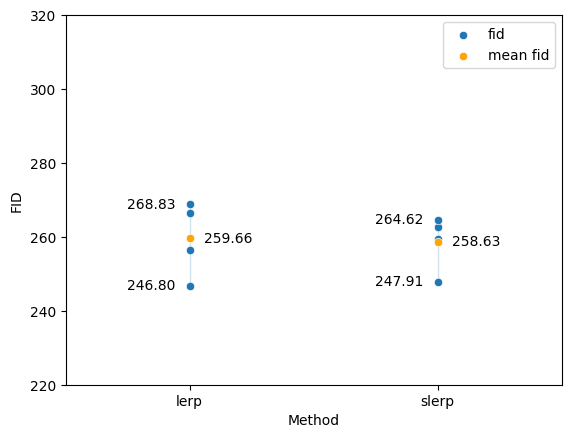

Evaluation for experiment 2


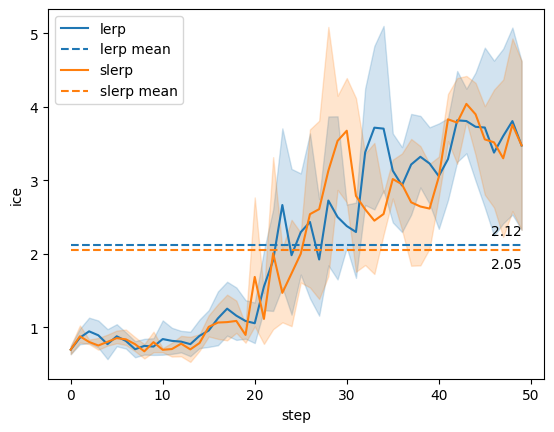

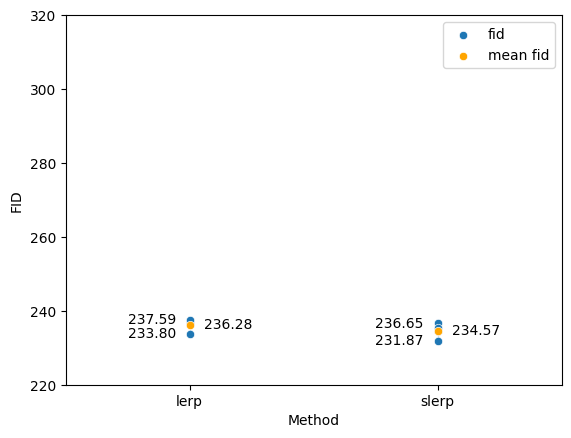

Evaluation for experiment 3


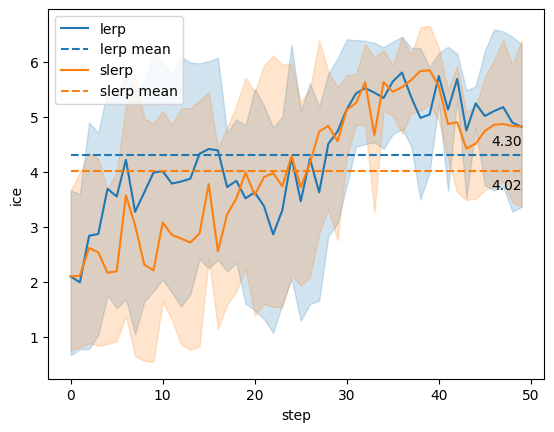

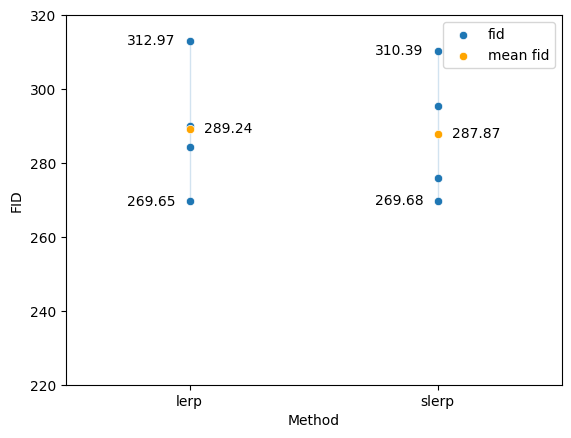

Evaluation for experiment 4


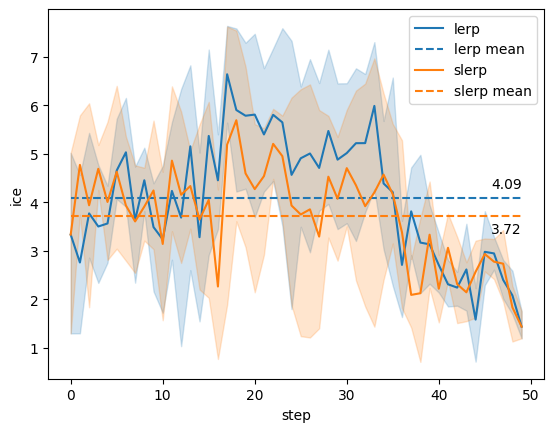

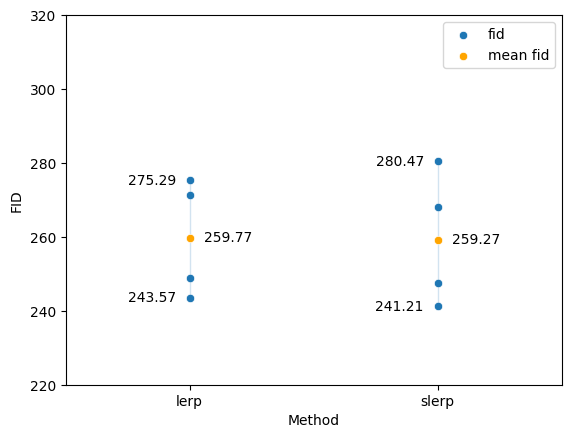

Evaluation for experiment 5


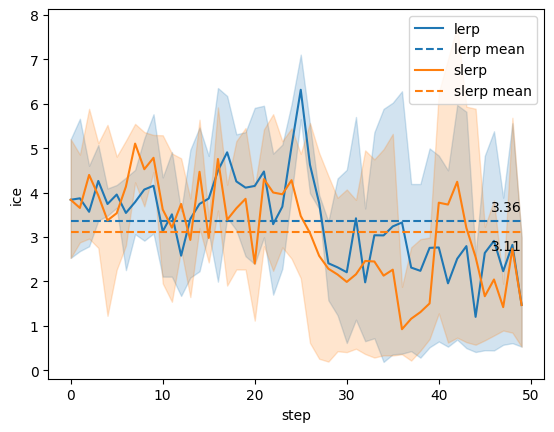

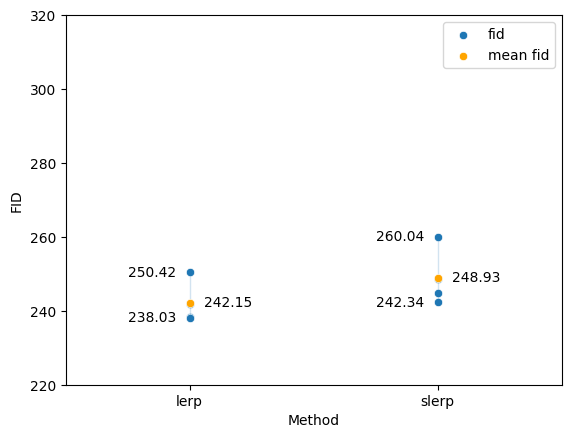

In [6]:
# plot the scores
for i, (ice_value, fid_value) in enumerate(zip(ice_values, fid_values)):
    print(f'Evaluation for experiment {i+1}')
    plot_ice_batch(ice_value, f'{out}ice{i+1}.{extension}')
    plot_fid_batch(fid_value, f'{out}fid{i+1}.{extension}')

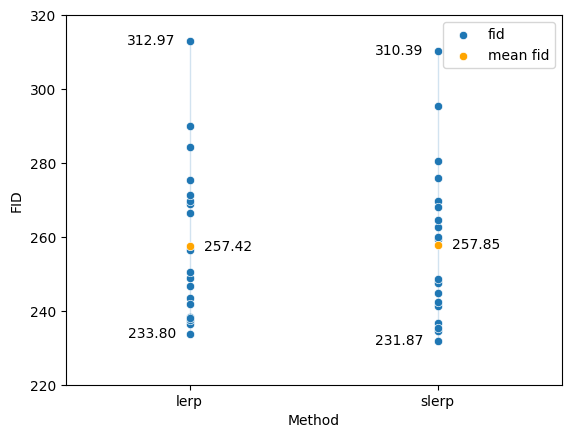

(2, 20)

In [7]:
import matplotlib.pyplot as plt
fid_values = np.array(fid_values)
fid_reshaped = fid_values.transpose(1, 0, 2).reshape(2,-1)
#plt.figure(figsize=(6, 6))
plot_fid_batch(fid_reshaped, f'plt_out/results/fid_all.{extension}')
fid_reshaped.shape

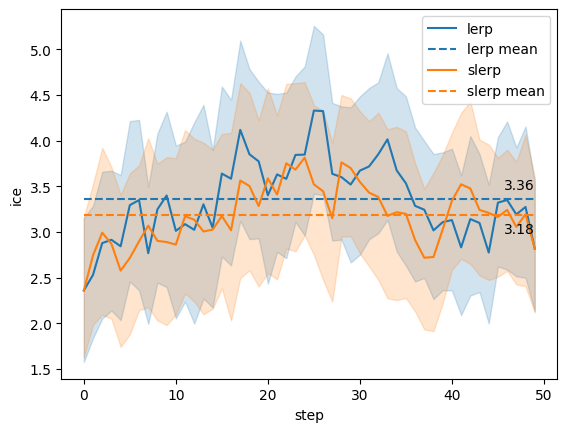

(2, 20, 50)

In [8]:
ice_values = np.array(ice_values)
ice_reshaped = ice_values.transpose(1, 0, 2, 3).reshape(2, -1, 50)
plot_ice_batch(ice_reshaped, f'plt_out/results/ice_all.{extension}')
ice_reshaped.shape